# Acquisizioni con CsI tallato

## Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
def import_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in tqdm(lines[9:]):
            if line.strip():
                columns = line.split()
                if len(columns)>4:
                    timestamp = float(columns[0])
                    trg_id = int(columns[1])
                    brd = int(columns[2])
                    ch = int(columns[3])
                    lg = int(columns[4])
                    hg = int(columns[5])
                else:
                    brd = int(columns[2-2])
                    ch = int(columns[3-2])
                    lg = int(columns[4-2])
                    hg = int(columns[5-2])
                data.append((timestamp, trg_id, brd, ch, lg, hg))
    return pd.DataFrame(data, columns=['Tstamp_us', 'TrgID', 'Brd', 'Ch', 'LG', 'HG'])

In [3]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

def func(x, a, b):
    return a + b*x

In [4]:
from matrix8x8_map import *

## data

In [5]:
pwd

'D:\\Developments\\fcc-hardware\\caen'

In [6]:
df = {}
for run in [32,33]:
    file_path = f'../../../Dati_A5202/test_CsI/Run{run}_list.txt'
    df[run] = import_data(file_path)
# Stampa il DataFrame
    print(df[run])

  0%|          | 0/9062336 [00:00<?, ?it/s]

            Tstamp_us   TrgID  Brd  Ch   LG    HG
0        3.022881e+04       0    0   0  151  1727
1        3.022881e+04       0    0   1  177  2041
2        3.022881e+04       0    0   2  116  1278
3        3.022881e+04       0    0   3  153  1686
4        3.022881e+04       0    0   4  150  1811
...               ...     ...  ...  ..  ...   ...
9062331  9.062629e+09  141633    0  59  110   863
9062332  9.062629e+09  141633    0  60  122  1234
9062333  9.062629e+09  141633    0  61   97   687
9062334  9.062629e+09  141633    0  62  114   909
9062335  9.062629e+09  141633    0  63  101   707

[9062336 rows x 6 columns]


  0%|          | 0/1207616 [00:00<?, ?it/s]

            Tstamp_us  TrgID  Brd  Ch   LG     HG
0        5.055074e+04      0    0   0  100    380
1        5.055074e+04      0    0   1  102    485
2        5.055074e+04      0    0   2   87    237
3        5.055074e+04      0    0   3   81  65521
4        5.055074e+04      0    0   4   89    234
...               ...    ...  ...  ..  ...    ...
1207611  1.977984e+09  18871    0  59   72  65532
1207612  1.977984e+09  18871    0  60   80    167
1207613  1.977984e+09  18871    0  61   89    263
1207614  1.977984e+09  18871    0  62   87     88
1207615  1.977984e+09  18871    0  63   98    107

[1207616 rows x 6 columns]


# summing sipm

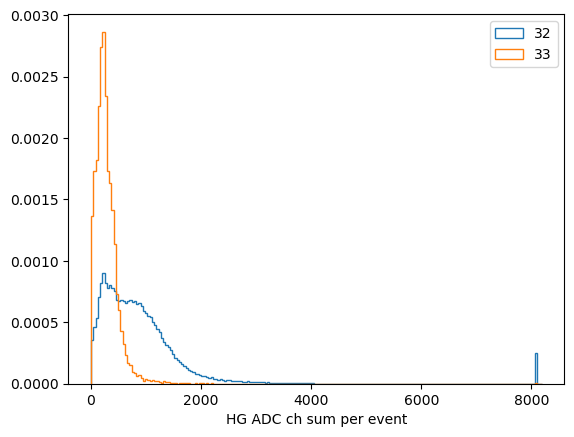

In [10]:
for run in [32,33]:
    sum_by_TrgID = df[run].query('Ch==15')['HG']
    plt.hist(sum_by_TrgID, bins=200, range=[0, (2**13)], histtype='step', density=True, label=str(run))
plt.legend()
plt.xlabel('HG ADC ch sum per event')
#plt.yscale('log')
plt.show()

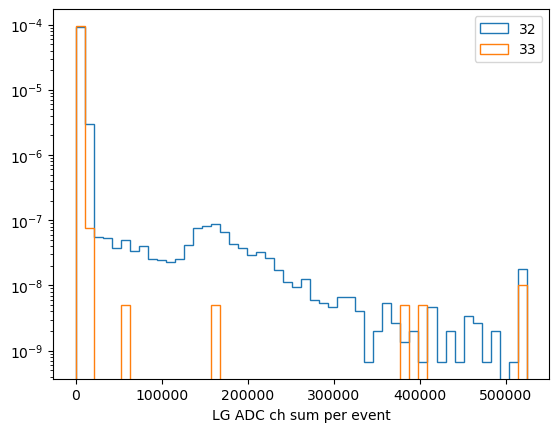

In [11]:
for run in [32,33]:
    sum_by_TrgID = df[run].groupby('TrgID')['LG'].sum()
    plt.hist(sum_by_TrgID, bins=50, range=[0, (2**13)*64], histtype='step', density=True, label=str(run))
plt.legend()
plt.xlabel('LG ADC ch sum per event')
plt.yscale('log')
plt.show()

# Rate Per Ora

In [12]:
rate = plt.hist(df[27]['Tstamp_us'].drop_duplicates()*1.e-6 * (1/(3600)), range = (0, 13), bins = 13)
print(sum(rate[0]))

KeyError: 27

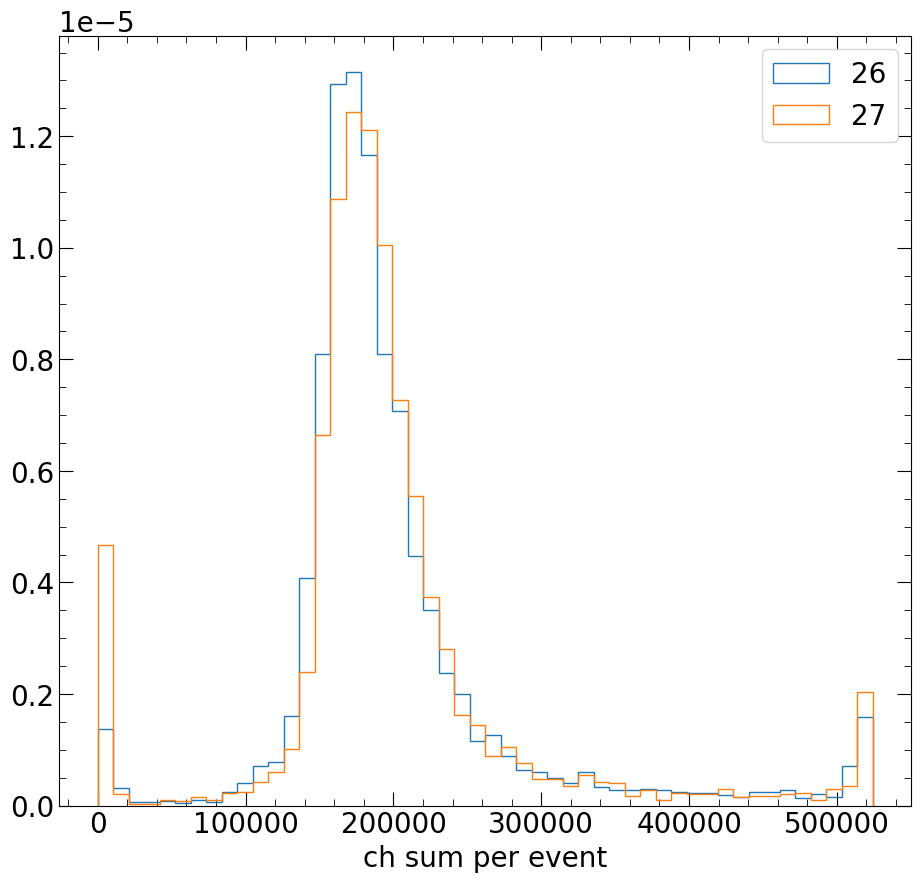

In [138]:
for run in [26,27]:
    sum_by_TrgID = df[run].groupby('TrgID')['LG'].sum()
    plt.hist(sum_by_TrgID, bins=50, range=[0, (2**13)*64], histtype='step', density=True, label=str(run))
plt.legend()
plt.xlabel('ch sum per event')
plt.show()

# Hist 2D per canale

In [13]:
df = {}
for run in [26, 27]:
    file_path = f'../../../Dati_A5202/test_CsI/Run{run}_list.txt'
    df[run] = import_data(file_path)
# Stampa il DataFrame
    print(df[run])

  0%|          | 0/450368 [00:00<?, ?it/s]

           Tstamp_us      TrgID  Brd  Ch    LG    HG
0       3.443741e+06      29477    0   0  3119  4041
1       3.443741e+06      29477    0   1  4032  5673
2       3.443741e+06      29477    0   2  3143  4315
3       3.443741e+06      29477    0   3  3139  4142
4       3.443741e+06      29477    0   4  3009  4246
...              ...        ...  ...  ..   ...   ...
450363  9.166064e+10  613851191    0  59  7433  8160
450364  9.166064e+10  613851191    0  60  7048  8084
450365  9.166064e+10  613851191    0  61  6761  8111
450366  9.166064e+10  613851191    0  62  7548  8123
450367  9.166064e+10  613851191    0  63  7546  8055

[450368 rows x 6 columns]


  0%|          | 0/245248 [00:00<?, ?it/s]

           Tstamp_us      TrgID  Brd  Ch    LG    HG
0       7.645606e+06      51376    0   0  2738  3712
1       7.645606e+06      51376    0   1  3109  4007
2       7.645606e+06      51376    0   2  2758  3684
3       7.645606e+06      51376    0   3  3113  3979
4       7.645606e+06      51376    0   4  3344  4911
...              ...        ...  ...  ..   ...   ...
245243  4.377772e+10  251862964    0  59  2873  4055
245244  4.377772e+10  251862964    0  60  2517  3369
245245  4.377772e+10  251862964    0  61  2454  3222
245246  4.377772e+10  251862964    0  62  2728  3634
245247  4.377772e+10  251862964    0  63  2271  3223

[245248 rows x 6 columns]


# LG and HG mean per channel

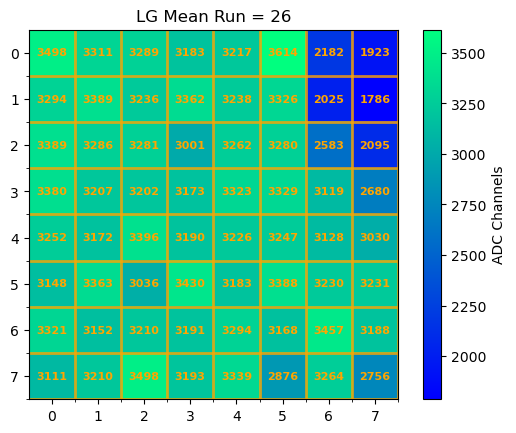

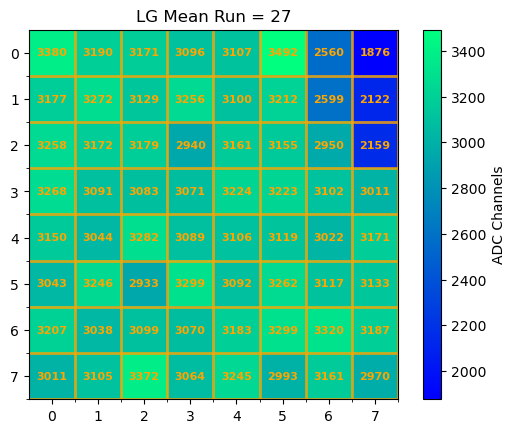

In [15]:
LG_mean = {} 
for run in [26,27]:
    LG_mean[run] = np.zeros((8,8))
    fig, ax = plt.subplots()
    plt.title(f'LG Mean Run = {run}')
    ax.set_xticks(np.array([i+0.5 for i in range(8)]), minor = True)
    ax.set_yticks(np.arange(8) + 0.5, minor = True)
    for i in range(8):
        for j in range(8):
            LG_mean[run][i][j] = np.mean(df[run].query(f'Ch == {sipm_map[i][j]}')['LG'])
    plt.imshow(LG_mean[run], interpolation = 'none', cmap = 'winter')
    for i in range(8):
        for j in range(8):
            x = j
            y = i
            valore = LG_mean[run][i][j]
            # Aggiunta del testo centrato
            plt.text(x, y, str(int(valore)), weight  = 'bold', color='orange', ha='center', va='center', fontsize=8)

    # Creazione della colorbar
    cbar = plt.colorbar(fraction = 0.046)
    cbar.set_label('ADC Channels')

    plt.grid(which= 'minor', linewidth=2, alpha = 0.8, color='orange')
    plt.show()



C:\Users\Belle2\AppData\Local\Temp\ipykernel_19700\2207936335.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks_labels)  # Assegna i tick letterali


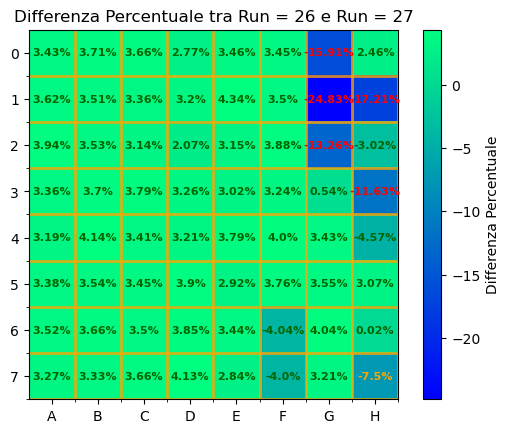

In [16]:
fig, ax = plt.subplots()
run_1 = 26
run_2 = 27
plotting = 200*(LG_mean[run_1] - LG_mean[run_2])/(LG_mean[run_1] + LG_mean[run_2])
plt.imshow(plotting, interpolation = 'none', cmap = 'winter')
plt.title(f'Differenza Percentuale tra Run = {run_1} e Run = {run_2}')
ax.set_xticks(np.array([i+0.5 for i in range(8)]), minor = True)
ax.set_yticks(np.arange(8) + 0.5, minor = True)
ticks_labels = ['1', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
ax.set_xticklabels(ticks_labels)  # Assegna i tick letterali
for i in range(8):
        for j in range(8):
            x = j
            y = i
            valore = plotting[i][j]
            # Aggiunta del testo centrato
            if abs(valore) < 5:
                clr = 'darkgreen'
            elif abs(valore) < 10:
                clr = 'orange'
            else:
                clr = 'red'
            plt.text(x, y, f'{round(valore,2)}%', weight  = 'bold', color=clr, ha='center', va='center', fontsize=8)
            
cbar = plt.colorbar(fraction = 0.046)
cbar.set_label('Differenza Percentuale')
plt.grid(which= 'minor', linewidth=2, alpha = 0.8, color='orange')
plt.show()

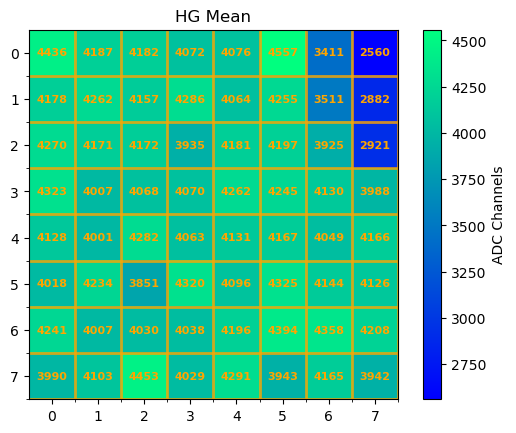

In [17]:
LG_mean = np.zeros((8,8))
fig, ax = plt.subplots()
plt.title(f'HG Mean')
ax.set_xticks(np.array([i+0.5 for i in range(8)]), minor = True)
ax.set_yticks(np.arange(8) + 0.5, minor = True)
for i in range(8):
    for j in range(8):
        LG_mean[i][j] = np.mean(df[run].query(f'Ch == {sipm_map[i][j]}')['HG'])

plt.imshow(LG_mean, interpolation = 'none', cmap = 'winter')

for i in range(8):
    for j in range(8):
        x = j
        y = i
        valore = LG_mean[i][j]
        # Aggiunta del testo centrato
        plt.text(x, y, str(int(valore)), weight  = 'bold', color='orange', ha='center', va='center', fontsize=8)

# Creazione della colorbar
cbar = plt.colorbar(fraction = 0.046)
cbar.set_label('ADC Channels')

plt.grid(which= 'minor', linewidth=2, alpha = 0.8, color='orange')
plt.show()